In [61]:
%matplotlib inline
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

import seaborn as sns

from datetime import datetime, timedelta

In [62]:
building3 = pd.read_csv('building3.csv')

In [65]:
building3['timestamp'] = pd.to_datetime(building3['timestamp'])
building3.dtypes

timestamp          datetime64[ns]
main_meter                float64
sub_meter_1               float64
sub_meter_2               float64
building_number             int64
dtype: object

In [5]:
assert(building3['building_number'].unique() == [3])

In [6]:
building3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26400 entries, 0 to 26399
Data columns (total 5 columns):
timestamp          26400 non-null datetime64[ns]
main_meter         26400 non-null float64
sub_meter_1        26400 non-null float64
sub_meter_2        26400 non-null float64
building_number    26400 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 1.0 MB


In [7]:
building3.head()

,timestamp,main_meter,sub_meter_1,sub_meter_2,building_number
0,2017-04-01 00:00:00,2663.181130,2359.451392,26.532342,3
1,2017-04-01 00:15:00,2366.406016,1992.106181,33.114303,3
2,2017-04-01 00:30:00,2482.173662,2104.718668,22.985089,3
3,2017-04-01 00:45:00,2479.055295,2155.859300,18.943633,3
4,2017-04-01 01:00:00,2415.018900,2072.522322,26.796459,3


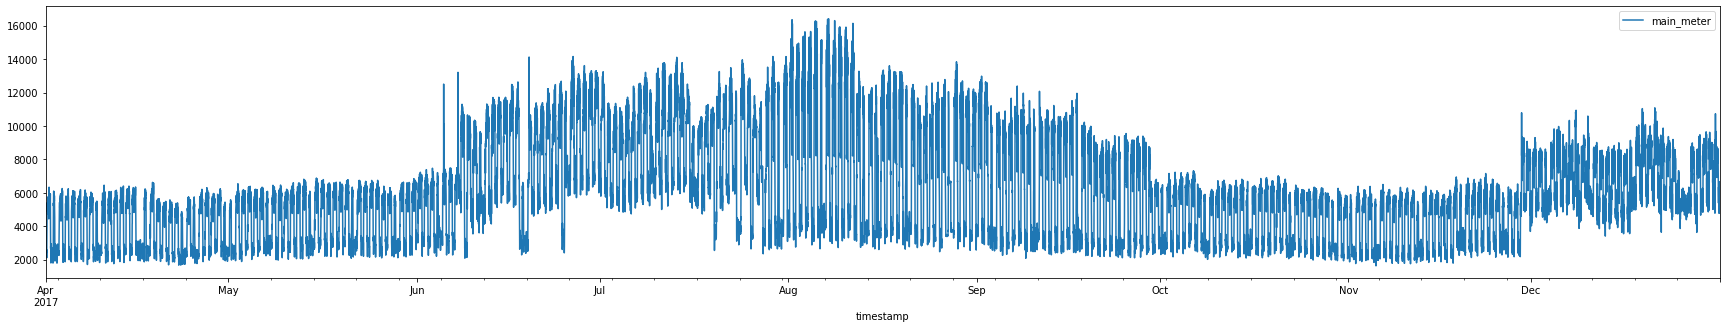

In [8]:
building3.plot(x='timestamp', y='main_meter', figsize=(30, 5))

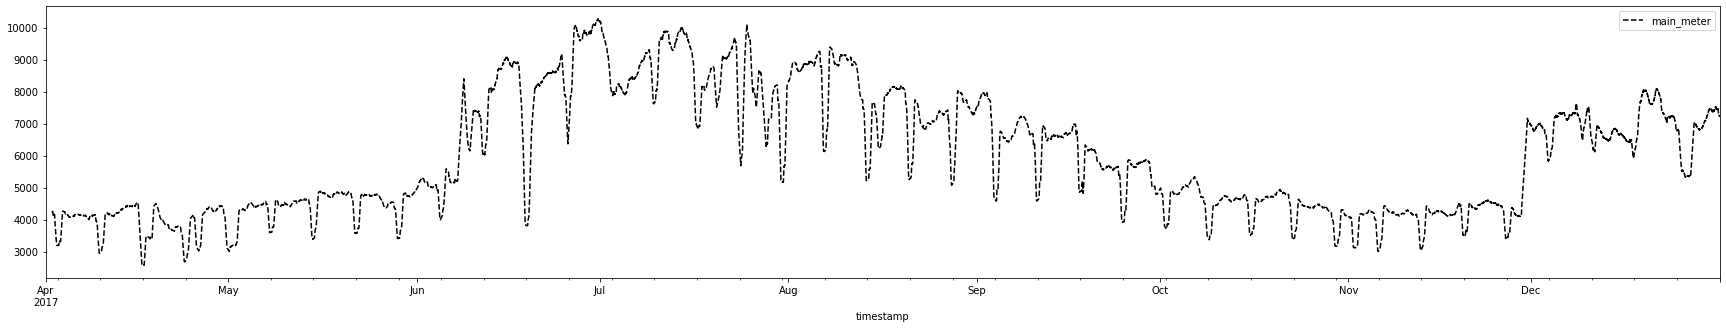

In [9]:
window = 96
building3[['timestamp', 'main_meter']].rolling(window, win_type=None, on='timestamp').mean().plot(x='timestamp', y='main_meter', figsize=(30, 5), style='k--')

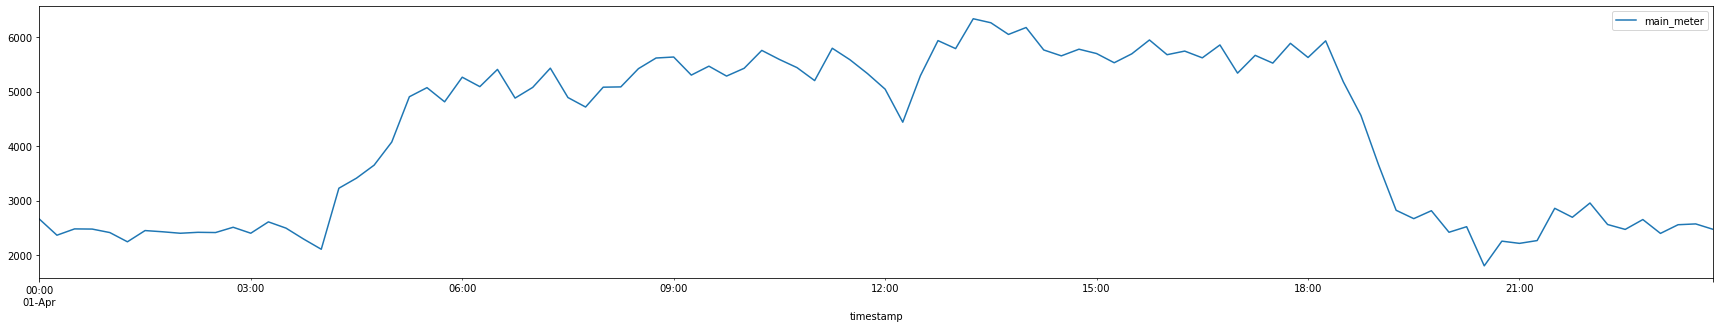

In [10]:
building3.iloc[:96].plot(x='timestamp', y='main_meter', figsize=(30, 5))

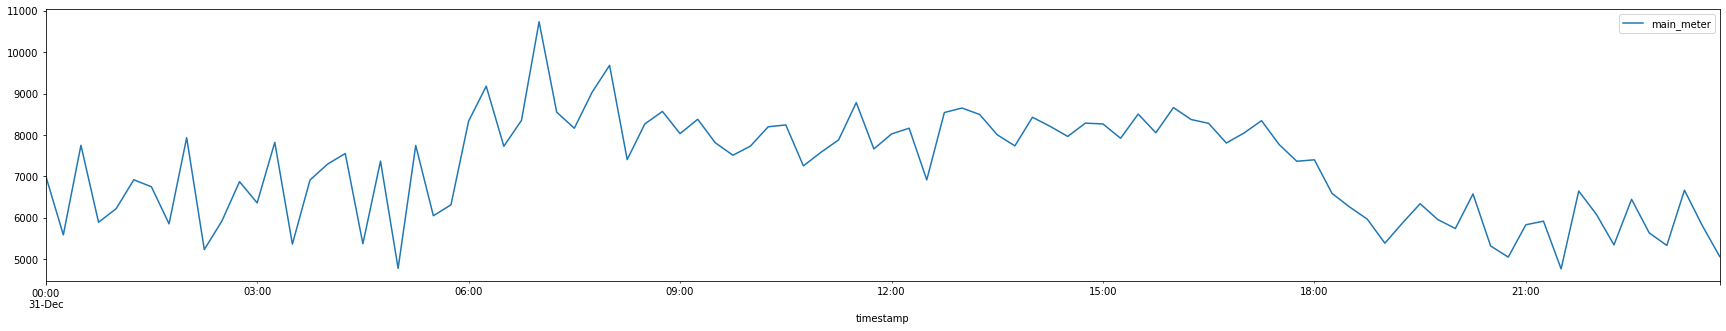

In [11]:
building3.iloc[-96:].plot(x='timestamp', y='main_meter', figsize=(30, 5))

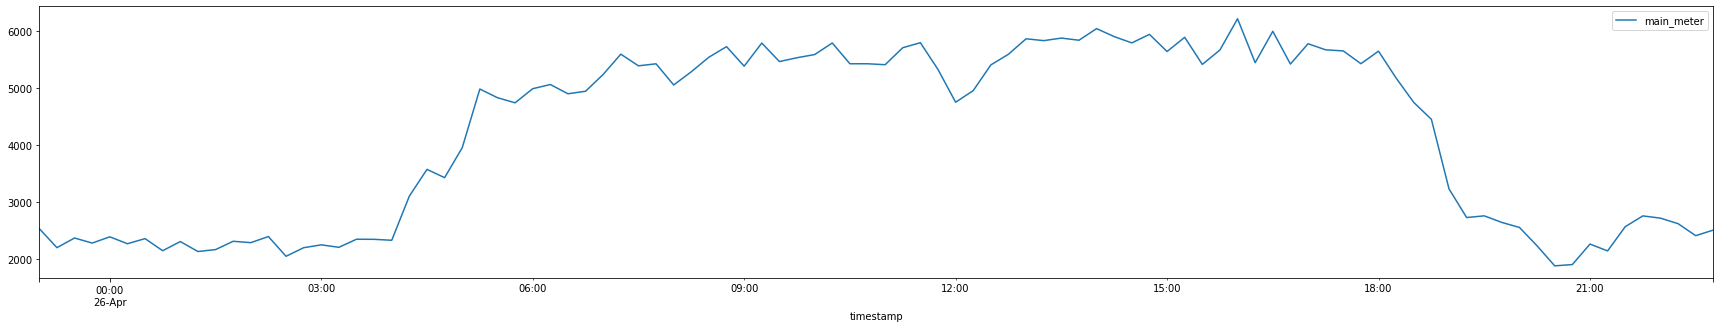

In [12]:
building3.iloc[2396:(2396+96)].plot(x='timestamp', y='main_meter', figsize=(30, 5))

In [13]:
day_wise_building3_main_meter = building3[['timestamp', 'main_meter']].rolling(window, win_type=None, on='timestamp').mean().iloc[95::96, :].reset_index(drop=True)
day_wise_building3_main_meter['timestamp'] = day_wise_building3_main_meter['timestamp'].apply(lambda x : x.date())
day_wise_building3_main_meter.head()

,timestamp,main_meter
0,2017-04-01,4248.582500
1,2017-04-02,3196.976766
2,2017-04-03,4258.284666
3,2017-04-04,4077.168181
4,2017-04-05,4153.460187


In [14]:
day_wise_building3_main_meter.shape

(275, 2)

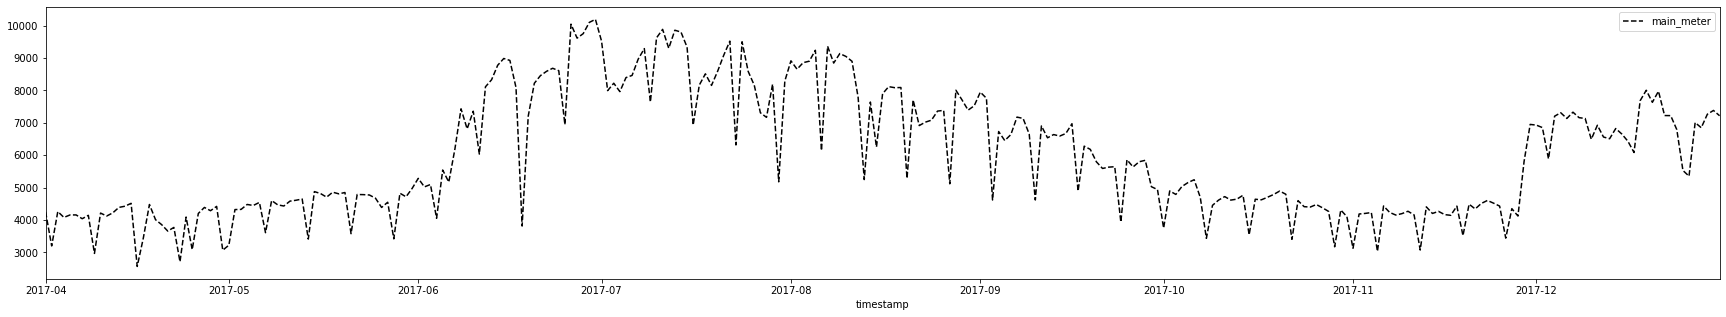

In [15]:
day_wise_building3_main_meter.plot(x='timestamp', y='main_meter', style='k--', figsize=(30, 5))

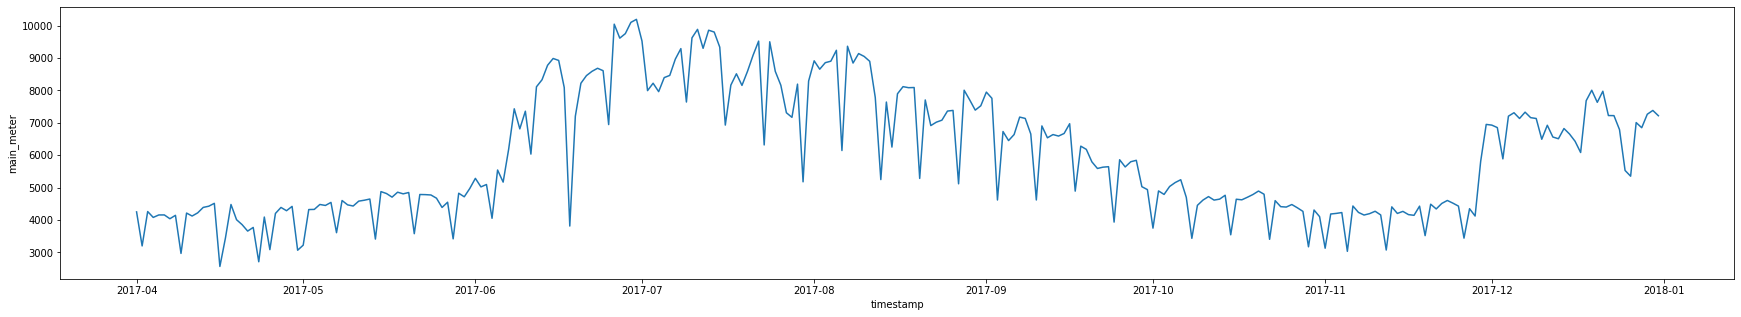

In [16]:
plt.figure(figsize=(30, 5))
sns.lineplot(data = day_wise_building3_main_meter, x='timestamp', y='main_meter')

### Adding all 96 data of a day as individual 96 columns

In [17]:
assert(np.array_equal(building3['main_meter'].values.reshape(-1, 96)[0], building3.loc[:95, 'main_meter'].values))

In [18]:
day_wise_building3_main_meter = pd.concat([day_wise_building3_main_meter, pd.DataFrame(building3['main_meter'].values.reshape(-1, 96))], axis=1)

In [19]:
day_wise_building3_main_meter.head()

,timestamp,main_meter,0,1,2,3,4,5,6,7,...,86,87,88,89,90,91,92,93,94,95
0,2017-04-01,4248.582500,2663.181130,2366.406016,2482.173662,2479.055295,2415.018900,2245.704229,2451.481388,2429.358139,...,2859.865707,2695.466822,2957.280966,2562.856581,2472.833873,2653.622784,2399.644505,2558.837151,2573.595721,2472.980020
1,2017-04-02,3196.976766,2562.889859,2352.684235,2602.023845,2375.663730,2446.226267,2525.642093,2362.149196,2424.159732,...,2895.917126,2548.960277,2818.717418,2663.514129,2485.728788,2359.964195,2935.624090,2743.192087,2594.710815,2380.442873
2,2017-04-03,4258.284666,2778.650594,2551.036647,2666.787828,2436.284286,2459.840298,2414.397985,2443.530110,2486.601404,...,2642.170146,2671.790366,2956.302550,2457.029857,2567.054940,2459.834283,2648.928489,2433.355641,2311.315402,2639.086328
3,2017-04-04,4077.168181,2449.629846,2304.286913,2496.532709,2272.798316,2552.411466,2358.981718,2346.015398,2403.595479,...,2645.974463,2598.128743,2636.884345,2487.782620,2480.628570,2350.617008,2626.349312,2355.516722,2527.038704,2260.503348
4,2017-04-05,4153.460187,2498.007494,2352.221780,2484.193625,2428.632932,2317.300664,2118.807322,2355.636665,2352.456821,...,2648.960913,2532.779502,2697.025916,2323.067735,2282.019584,2629.767545,2705.626209,2550.490238,2438.743780,2441.622408


### Adding `is_weekend` column

In [20]:
day_wise_building3_main_meter.insert(1, 'is_weekend', day_wise_building3_main_meter['timestamp'].apply(lambda x : x.weekday()>=5).astype(int))
day_wise_building3_main_meter.head()

,timestamp,is_weekend,main_meter,0,1,2,3,4,5,6,...,86,87,88,89,90,91,92,93,94,95
0,2017-04-01,1,4248.582500,2663.181130,2366.406016,2482.173662,2479.055295,2415.018900,2245.704229,2451.481388,...,2859.865707,2695.466822,2957.280966,2562.856581,2472.833873,2653.622784,2399.644505,2558.837151,2573.595721,2472.980020
1,2017-04-02,1,3196.976766,2562.889859,2352.684235,2602.023845,2375.663730,2446.226267,2525.642093,2362.149196,...,2895.917126,2548.960277,2818.717418,2663.514129,2485.728788,2359.964195,2935.624090,2743.192087,2594.710815,2380.442873
2,2017-04-03,0,4258.284666,2778.650594,2551.036647,2666.787828,2436.284286,2459.840298,2414.397985,2443.530110,...,2642.170146,2671.790366,2956.302550,2457.029857,2567.054940,2459.834283,2648.928489,2433.355641,2311.315402,2639.086328
3,2017-04-04,0,4077.168181,2449.629846,2304.286913,2496.532709,2272.798316,2552.411466,2358.981718,2346.015398,...,2645.974463,2598.128743,2636.884345,2487.782620,2480.628570,2350.617008,2626.349312,2355.516722,2527.038704,2260.503348
4,2017-04-05,0,4153.460187,2498.007494,2352.221780,2484.193625,2428.632932,2317.300664,2118.807322,2355.636665,...,2648.960913,2532.779502,2697.025916,2323.067735,2282.019584,2629.767545,2705.626209,2550.490238,2438.743780,2441.622408


### Getting separate lineplot for weekend and weekday

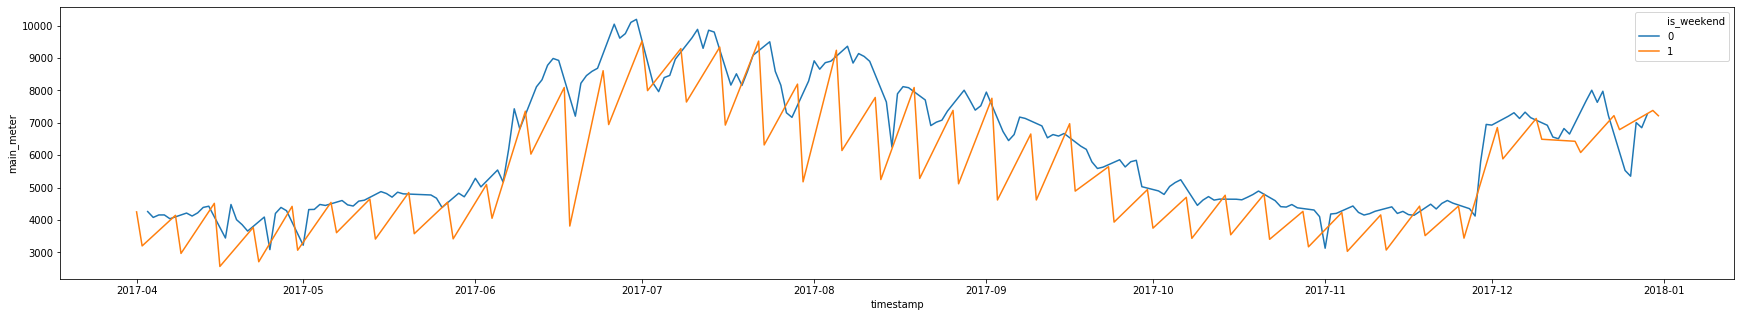

In [21]:
plt.figure(figsize=(30, 5))
ax = sns.lineplot(data = day_wise_building3_main_meter, x='timestamp', y='main_meter', hue='is_weekend')

(736420.0, 736694.0)

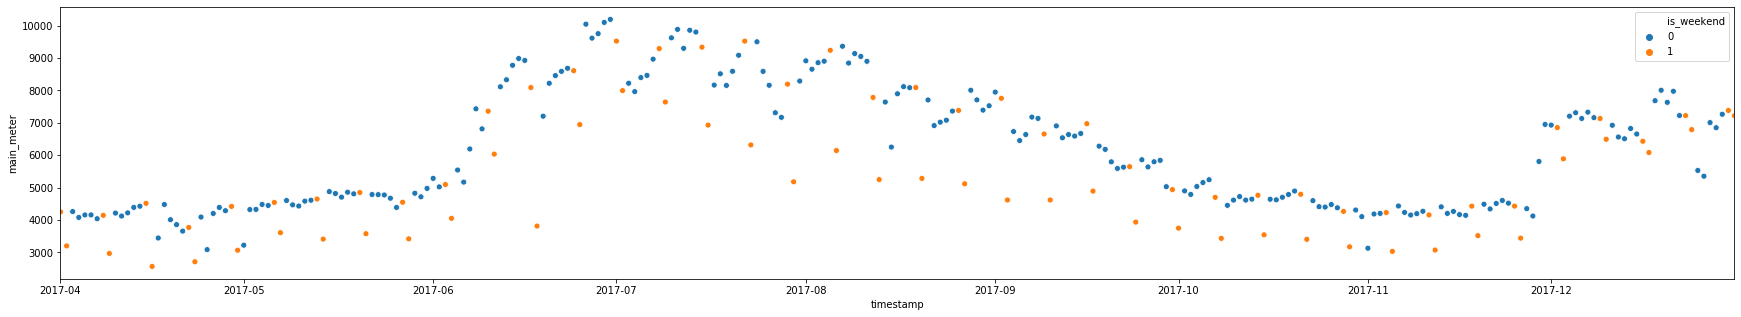

In [22]:
plt.figure(figsize=(30, 5))
ax = sns.scatterplot(data = day_wise_building3_main_meter, x='timestamp', y='main_meter', hue='is_weekend')
ax.set_xlim(day_wise_building3_main_meter['timestamp'].min(), day_wise_building3_main_meter['timestamp'].max())

In [23]:
day_wise_building3_main_meter.loc[day_wise_building3_main_meter.is_weekend == 1, 'main_meter'].mean()

5449.133248504019

In [24]:
day_wise_building3_main_meter.loc[day_wise_building3_main_meter.is_weekend == 0, 'main_meter'].mean()

6204.134911703791

In [25]:
def plot_custom_line_plots(data, col, label_column):
    """
    According to given labels column, change color of same line
    NOTE: For now considered label_column to be binary
    """
    
    cmap = ListedColormap(colors=['b', 'r'])
    norm = BoundaryNorm()
    
    points = data.loc[data[label_column] == 1, col].values
    segements = []

In [26]:
t = np.linspace(0, 10, 200)
x = np.cos(np.pi * t)
y = np.sin(t)

In [27]:
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

In [28]:
x.shape

(200,)

In [29]:
y.shape

(200,)

In [30]:
points[:5]

array([[[1.        , 0.        ]],

       [[0.98756455, 0.05023011]],

       [[0.95056749, 0.10033341]],

       [[0.88992896, 0.15018339]],

       [[0.8071571 , 0.19965422]]])

## FINDING SHARP CHANGE POINTS

(736619.0, 736627.0)

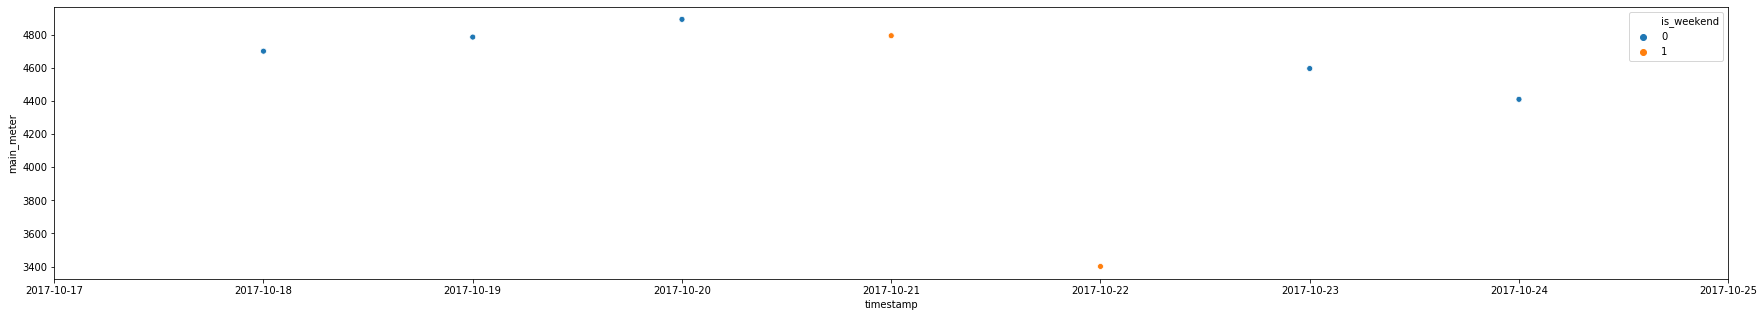

In [31]:
data = day_wise_building3_main_meter.iloc[200:207]

plt.figure(figsize=(30, 5))
ax = sns.scatterplot(data = data, x='timestamp', y='main_meter', hue='is_weekend')
ax.set_xlim(data['timestamp'].min() - timedelta(days=1), data['timestamp'].max() + timedelta(days=1))

### Checking behaviour around national holidays

(736549.0, 736563.0)

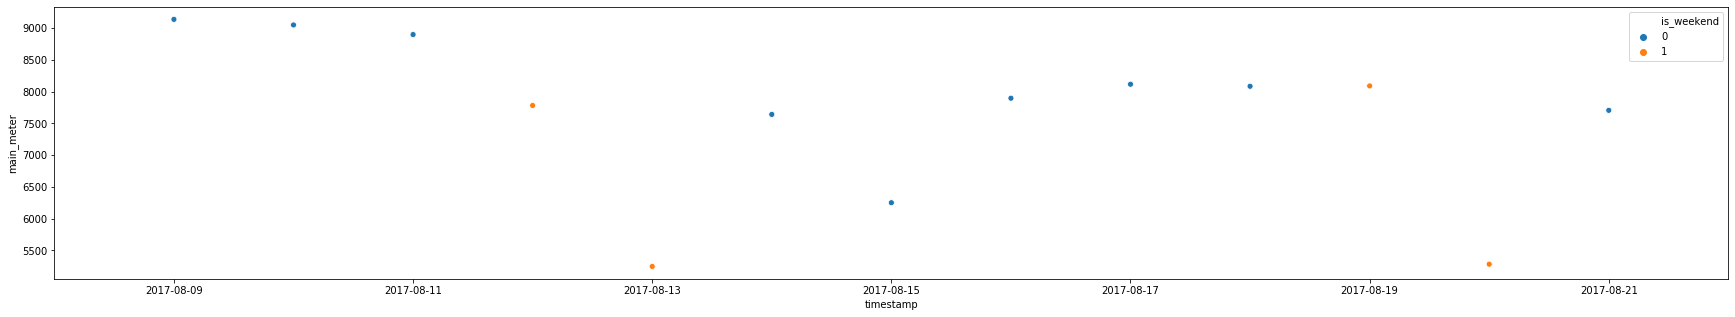

In [32]:
data = day_wise_building3_main_meter.iloc[130:143]

plt.figure(figsize=(30, 5))
ax = sns.scatterplot(data = data, x='timestamp', y='main_meter', hue='is_weekend')
ax.set_xlim(data['timestamp'].min() - timedelta(days=1), data['timestamp'].max() + timedelta(days=1))

(736549.0, 736563.0)

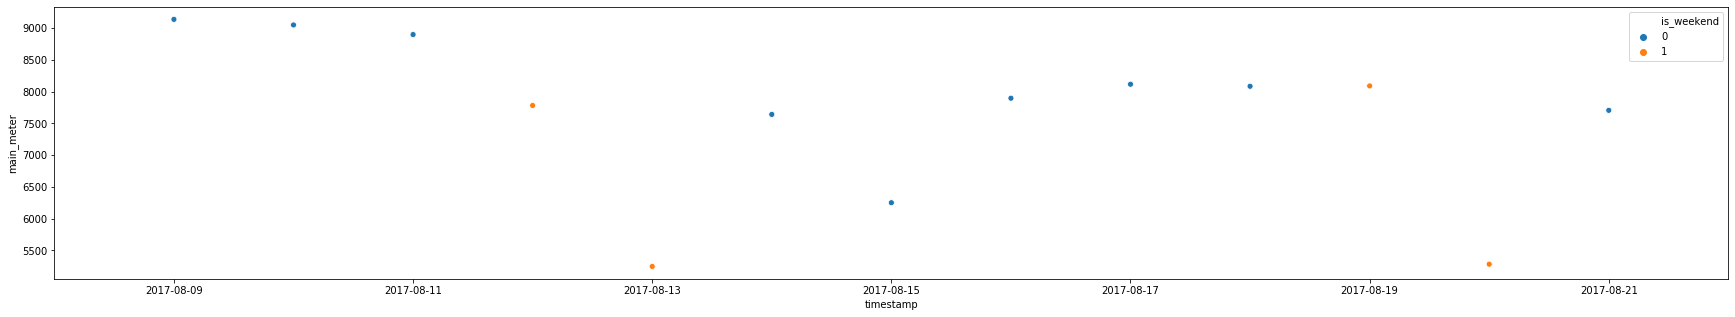

In [33]:
data = day_wise_building3_main_meter.iloc[130:143]

plt.figure(figsize=(30, 5))
ax = sns.scatterplot(data = data, x='timestamp', y='main_meter', hue='is_weekend')
ax.set_xlim(data['timestamp'].min() - timedelta(days=1), data['timestamp'].max() + timedelta(days=1))

In [34]:
day_wise_building3_main_meter.head()

,timestamp,is_weekend,main_meter,0,1,2,3,4,5,6,...,86,87,88,89,90,91,92,93,94,95
0,2017-04-01,1,4248.582500,2663.181130,2366.406016,2482.173662,2479.055295,2415.018900,2245.704229,2451.481388,...,2859.865707,2695.466822,2957.280966,2562.856581,2472.833873,2653.622784,2399.644505,2558.837151,2573.595721,2472.980020
1,2017-04-02,1,3196.976766,2562.889859,2352.684235,2602.023845,2375.663730,2446.226267,2525.642093,2362.149196,...,2895.917126,2548.960277,2818.717418,2663.514129,2485.728788,2359.964195,2935.624090,2743.192087,2594.710815,2380.442873
2,2017-04-03,0,4258.284666,2778.650594,2551.036647,2666.787828,2436.284286,2459.840298,2414.397985,2443.530110,...,2642.170146,2671.790366,2956.302550,2457.029857,2567.054940,2459.834283,2648.928489,2433.355641,2311.315402,2639.086328
3,2017-04-04,0,4077.168181,2449.629846,2304.286913,2496.532709,2272.798316,2552.411466,2358.981718,2346.015398,...,2645.974463,2598.128743,2636.884345,2487.782620,2480.628570,2350.617008,2626.349312,2355.516722,2527.038704,2260.503348
4,2017-04-05,0,4153.460187,2498.007494,2352.221780,2484.193625,2428.632932,2317.300664,2118.807322,2355.636665,...,2648.960913,2532.779502,2697.025916,2323.067735,2282.019584,2629.767545,2705.626209,2550.490238,2438.743780,2441.622408


### Inserting `main_meter_diff` as a column

In [35]:
main_meter_diff = day_wise_building3_main_meter['main_meter'] - day_wise_building3_main_meter['main_meter'].shift(periods=1)
day_wise_building3_main_meter.insert(3, 'main_meter_diff', main_meter_diff)
day_wise_building3_main_meter.head()

,timestamp,is_weekend,main_meter,main_meter_diff,0,1,2,3,4,5,...,86,87,88,89,90,91,92,93,94,95
0,2017-04-01,1,4248.582500,NaN,2663.181130,2366.406016,2482.173662,2479.055295,2415.018900,2245.704229,...,2859.865707,2695.466822,2957.280966,2562.856581,2472.833873,2653.622784,2399.644505,2558.837151,2573.595721,2472.980020
1,2017-04-02,1,3196.976766,-1051.605734,2562.889859,2352.684235,2602.023845,2375.663730,2446.226267,2525.642093,...,2895.917126,2548.960277,2818.717418,2663.514129,2485.728788,2359.964195,2935.624090,2743.192087,2594.710815,2380.442873
2,2017-04-03,0,4258.284666,1061.307900,2778.650594,2551.036647,2666.787828,2436.284286,2459.840298,2414.397985,...,2642.170146,2671.790366,2956.302550,2457.029857,2567.054940,2459.834283,2648.928489,2433.355641,2311.315402,2639.086328
3,2017-04-04,0,4077.168181,-181.116485,2449.629846,2304.286913,2496.532709,2272.798316,2552.411466,2358.981718,...,2645.974463,2598.128743,2636.884345,2487.782620,2480.628570,2350.617008,2626.349312,2355.516722,2527.038704,2260.503348
4,2017-04-05,0,4153.460187,76.292006,2498.007494,2352.221780,2484.193625,2428.632932,2317.300664,2118.807322,...,2648.960913,2532.779502,2697.025916,2323.067735,2282.019584,2629.767545,2705.626209,2550.490238,2438.743780,2441.622408


## FOR DECLINE POINTS

## TODO
- Find Suitable `value_for_decline`

In [36]:
def get_decline_dates(data, shift=1, value_for_decline=-500):
    timestamps_with_decline = data[(data['main_meter'] - data['main_meter'].shift(periods=shift)) <= value_for_decline].timestamp
    return timestamps_with_decline, timestamps_with_decline.apply(lambda data : data.weekday())

In [37]:
timestamps_with_decline, weekdays_with_decline = get_decline_dates(day_wise_building3_main_meter, shift=1, value_for_decline=-400)

In [38]:
timestamps_with_decline.shape

(59,)

In [39]:
weekdays_with_decline.value_counts()

6    38
5     6
1     6
2     4
4     3
3     1
0     1
Name: timestamp, dtype: int64

In [40]:
pd.set_option('display.max_rows', 70)

In [41]:
day_wise_building3_main_meter.iloc[-2:]

,timestamp,is_weekend,main_meter,main_meter_diff,0,1,2,3,4,5,...,86,87,88,89,90,91,92,93,94,95
273,2017-12-30,1,7380.876348,117.398791,6511.831821,5631.020178,5704.916371,6554.955682,6185.150115,6369.305339,...,5405.395081,6922.171110,6802.237254,5442.953534,6358.571357,5963.986304,6406.442630,6372.499861,6298.447595,6372.056599
274,2017-12-31,1,7217.312594,-163.563755,7016.549503,5590.417737,7751.009010,5894.404762,6223.351242,6919.562228,...,4770.716802,6647.475596,6086.711019,5349.458381,6447.978550,5637.985733,5335.428699,6667.769300,5823.047654,5068.992623


In [42]:
building3_decline_df = pd.concat([
                            timestamps_with_decline,
                            weekdays_with_decline,
                            day_wise_building3_main_meter.loc[timestamps_with_decline.index, 'main_meter_diff']], axis=1, ignore_index=True)
building3_decline_df.rename(columns = {0:'timestamp', 1:'weekday', 2:'main_meter_diff'}, inplace=True)
building3_decline_df.sort_values(by='timestamp', ascending=True)

,timestamp,weekday,main_meter_diff
1,2017-04-02,6,-1051.605734
8,2017-04-09,6,-1176.351164
15,2017-04-16,6,-1948.823975
18,2017-04-19,2,-469.781343
22,2017-04-23,6,-1060.226327
24,2017-04-25,1,-1005.835967
29,2017-04-30,6,-1353.456499
36,2017-05-07,6,-935.068951
43,2017-05-14,6,-1236.821234
50,2017-05-21,6,-1271.484522


In [43]:
print('Num of Sunday : ', (building3_decline_df.weekday == 6).sum())

Num of Sunday :  38


## All sundays except 31, but there is a decline about (-100) from 20 to 31

In [44]:
building3_decline_df[building3_decline_df.weekday != 6].sort_values(by='timestamp')

,timestamp,weekday,main_meter_diff
18,2017-04-19,2,-469.781343
24,2017-04-25,1,-1005.835967
69,2017-06-09,4,-619.593788
77,2017-06-17,5,-836.982912
87,2017-06-27,1,-431.257172
91,2017-07-01,5,-670.375368
102,2017-07-12,2,-584.985862
105,2017-07-15,5,-466.123048
115,2017-07-25,1,-914.089674
116,2017-07-26,2,-429.259907


## Observations
- Will remove 26-12-2017 due to effects of Christmas
- Will remove 16-08-2017 due to effects of Independece Day

## Inference
- Will remove points below a threshold, like 1000

## FOR INCREMENT POINTS

## TODO
- Find Suitable `value_for_increase`

In [45]:
def get_increase_dates(data, shift=1, value_for_increase=500):
    timestamps_with_increase = data[(data['main_meter'] - data['main_meter'].shift(periods=shift)) >= value_for_increase].timestamp
    return timestamps_with_increase, timestamps_with_increase.apply(lambda data : data.weekday())

In [46]:
timestamps_with_increase, weekdays_with_increase = get_increase_dates(day_wise_building3_main_meter, shift=1, value_for_increase=400)

In [47]:
timestamps_with_increase.shape

(60,)

In [48]:
weekdays_with_increase.value_counts()

0    36
2     7
3     6
4     4
1     4
5     3
Name: timestamp, dtype: int64

In [49]:
pd.set_option('display.max_rows', 70)

In [50]:
building3_increase_df = pd.concat([
                            timestamps_with_increase,
                            weekdays_with_increase,
                            day_wise_building3_main_meter.loc[timestamps_with_increase.index, 'main_meter_diff']], axis=1, ignore_index=True)
building3_increase_df.rename(columns = {0:'timestamp', 1:'weekday', 2:'main_meter_diff'}, inplace=True)

In [51]:
print('Num of Monday : ', (building3_increase_df.weekday == 0).sum())

Num of Monday :  36


## All sundays except 31, but there is a decline about (-100) from 20 to 31

In [52]:
building3_increase_df[building3_increase_df.weekday != 0].sort_values(by='timestamp')

,timestamp,weekday,main_meter_diff
17,2017-04-18,1,1034.781983
25,2017-04-26,2,1116.791128
31,2017-05-02,1,1099.981057
67,2017-06-07,2,1023.148584
68,2017-06-08,3,1240.641587
70,2017-06-10,5,545.274957
74,2017-06-14,2,447.664782
80,2017-06-20,1,1016.232543
95,2017-07-05,2,433.462711
97,2017-07-07,4,502.643343


## Observations

## Inference
